## Introduction

Getting started with A/B testing from scratch can often feel like a daunting task, but it doesn't have to be. Certainly, transforming your company or department into a fully data-driven organization will take a lot of time, training, and appropriate tooling. But long before you reach that point, it is possible to start extracting value from your data by creating quick reports that you can easily share with non-technical colleagues.

**babbab** is intended exactly for this! Its two purposes are:
1. To be the *simplest* tool for Data Analysts/Statisticians to **analyze** A/B tests.
2. To return the *simplest* results for Stakeholders/Non-Statisticians to **understand**.

## Installation

This should work in vanilla Python +3.8.

In [1]:
pip install babbab

Note: you may need to restart the kernel to use updated packages.


## A quick example

Let's see babbab in action using the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing)

Cookie cats is a typical "match three" game, where three or more tiles of the same type need to be aligned in order to clear them. Occasionally, players will reach a gate where they need to either wait or make an in-app purchase before being allowed to progress with the game.

In this dataset, we have a sample of players; for some of them, the first gate was placed at level 30, and for others it was at level 40. We would like to analyze how this change impacts player retention.

Let's start by importing pandas, loading our dataset, and previewing it:

In [3]:
import pandas as pd

df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


We have 5 columns. The ones that are relevant for us are:
- **version** represents whether the player had the first gate at level 30 (control group) or 40 (variant)
- **retention_1** represents whether the player came back 1 day after installing the game
- **retention_7** represents whether the player came back 7 days after installing the game

Let's use **babbab** to quickly check whether pushing the gate back 10 levels had any effect on the retention after one day. We just need the number of total users en each group, and the number of players that returned:

In [4]:
num_control_retention1 = len(df[(df['version'] == 'gate_30')&(df['retention_1'] == True)])
num_control_users = len(df[df['version'] == 'gate_30'])
num_variant_retention1 = len(df[(df['version'] == 'gate_40')&(df['retention_1'] == True)])
num_variant_users = len(df[df['version'] == 'gate_40'])

And now, we can just use the function `quick_analysis()` to analyze and plot the results:

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [control, variant]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 3 seconds.


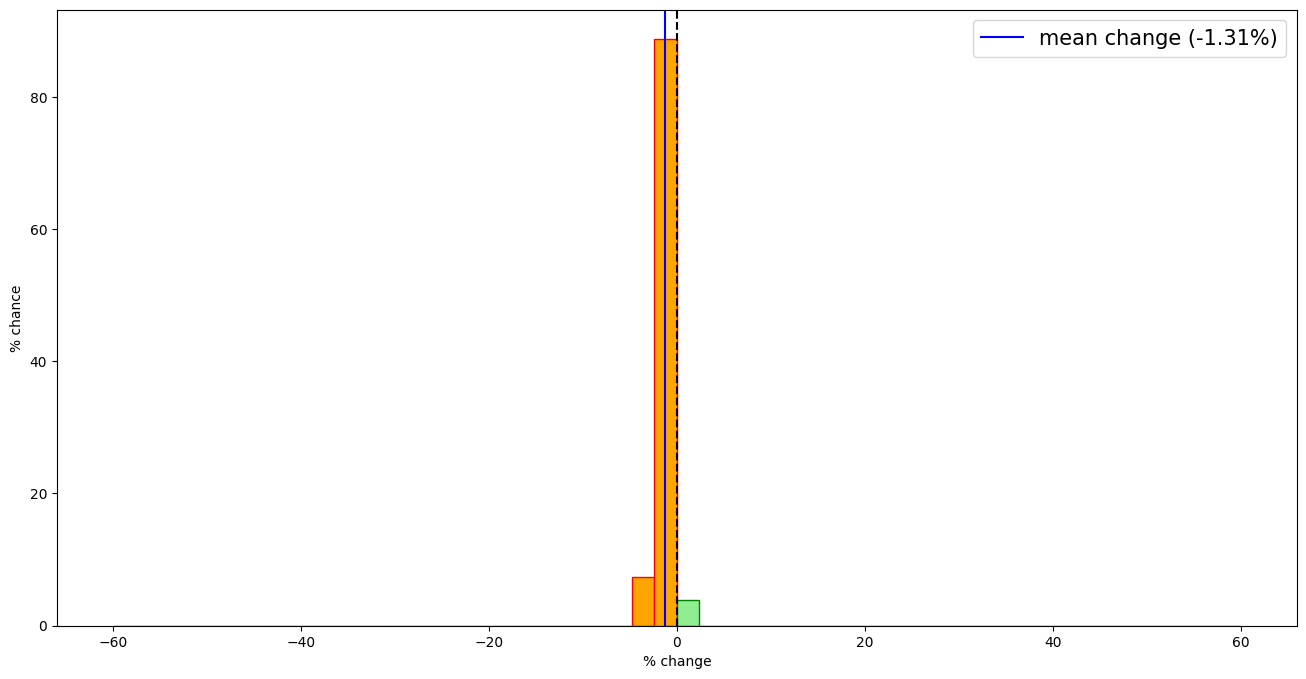

In [6]:
import babbab as bab

plot, statement, trace = bab.quick_analysis(num_control_retention1, 
                                            num_control_users, 
                                            num_variant_retention1, 
                                            num_variant_users)

It's as simple as that!

Upon first inspection, it would appear that pushing back the gate has a very slightly negative effect. With **babbab**, you have everything you need:

1. In `plot` you will find a matplotlib figure. You can change the title and labels in the quick_analysis function.
2. In `statement`, you will get a string that is intended to be interpreted verbatim by Non-Statisticians.
3. In `trace`, you will get an arviz InferenceData object, in case you want to explore the run further.

In the signature of `quick_analysis` you can configure the statistics and the aesthetics of most of this. See the next section for more examples!

In [7]:
statement

'There is a 95% chance that the difference forVariant with respect to Control is between -2.4% and -0.4%'

## Advanced parameters

Due to the large sample size, we have a very tight distribution - this is great, since it ensures that our estimations are spot-on. However, the challenge lies in representing this precision when visualized with bars that are, well, on the chunkier side.

Let's spruce up our plot to make it not only visually appealing but also more shareable and informative:
- We're increasing the `bins` parameter from its default (50) to 150. This adjustment gives us a more detailed view with slimmer bars.
- Decreasing the `xlimit` parameter to 10 (default is 60) will let us zoom in and focus on the nuances.
- Using the `title` parameter, we will inject a concise statement into the chart, ensuring that a quick glance is all it takes to grasp the essentials.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [control, variant]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 4 seconds.


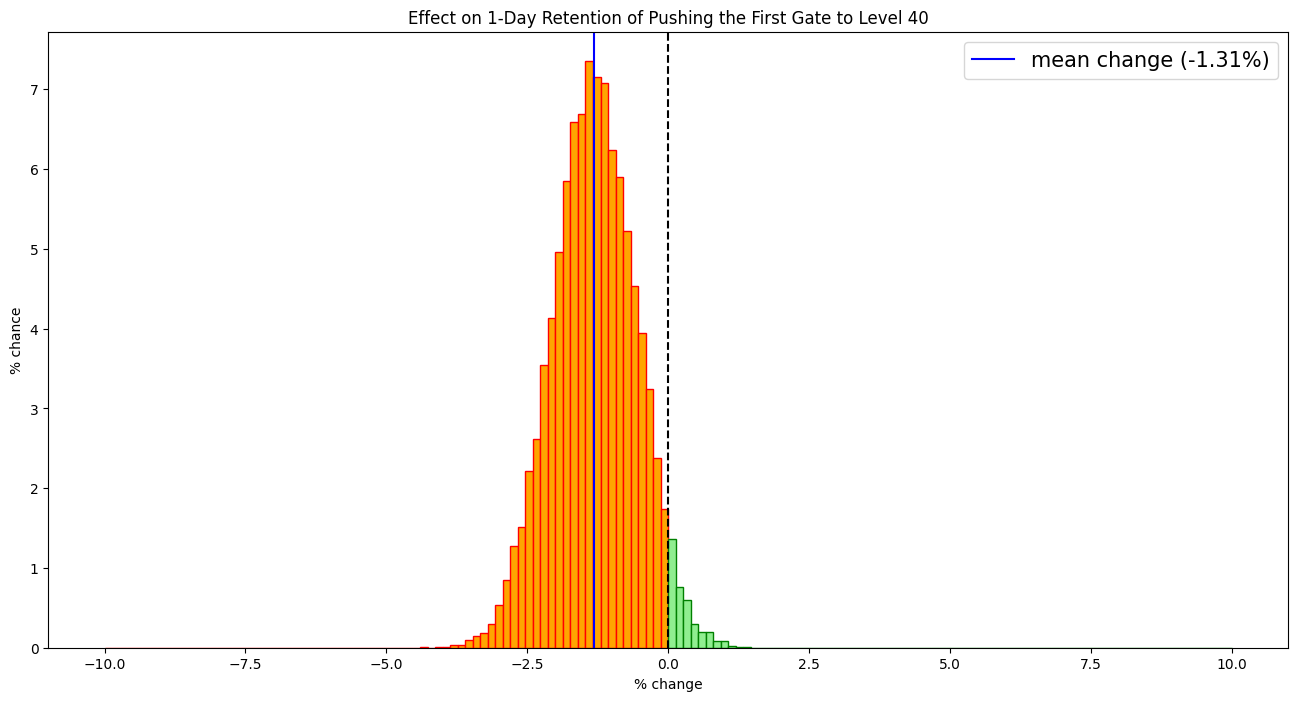

In [9]:
plot, statement, trace = bab.quick_analysis(num_control_retention1, 
                                            num_control_users, 
                                            num_variant_retention1, 
                                            num_variant_users,
                                           bins=150,
                                           xlimit = 10,
                                           title = 'Effect on 1-Day Retention of Pushing the First Gate to Level 40')